In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hr_data= pd.read_csv('E:/DATA SCIENCE/FIREBLAZE AL SCHOOL/DATASET/HR_comma_sep.csv')

In [3]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
hr_data.shape

(14999, 10)

###  Replace wrong column name with appropriate column name

In [6]:
hr_data.rename(columns={'sales':'Department'}, inplace=True)

In [7]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### How many unique departments are there ?

In [8]:
hr_data['Department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

### What is the precentage distribution of people in departments?

In [9]:
hr_data['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [10]:
hr_data['Department'].value_counts(normalize=True).mul(100).round(1).astype(str)+'%'

sales          27.6%
technical      18.1%
support        14.9%
IT              8.2%
product_mng     6.0%
marketing       5.7%
RandD           5.2%
accounting      5.1%
hr              4.9%
management      4.2%
Name: Department, dtype: object

### Bar graph to visualise the above count and percentage distribution of department

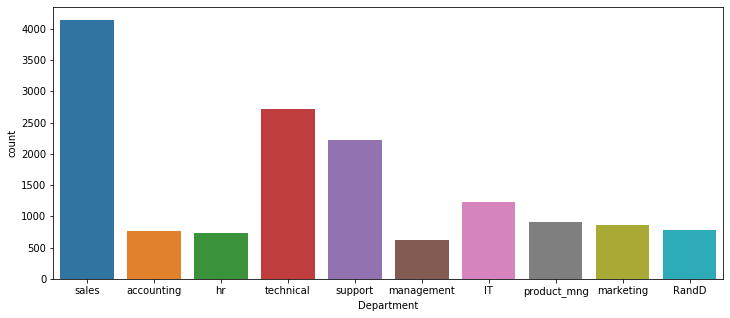

In [11]:
plt.figure(figsize=(12,5))
sns.countplot(data=hr_data,x='Department')
plt.show()

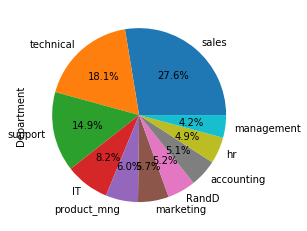

In [12]:
hr_data['Department'].value_counts().plot(kind='pie', autopct="%1.1f%%")

In [14]:
pd.crosstab(hr_data['salary'],hr_data['Department'])

Department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
high,83,51,74,45,225,80,68,269,141,201
low,609,364,358,335,180,402,451,2099,1146,1372
medium,535,372,335,359,225,376,383,1772,942,1147


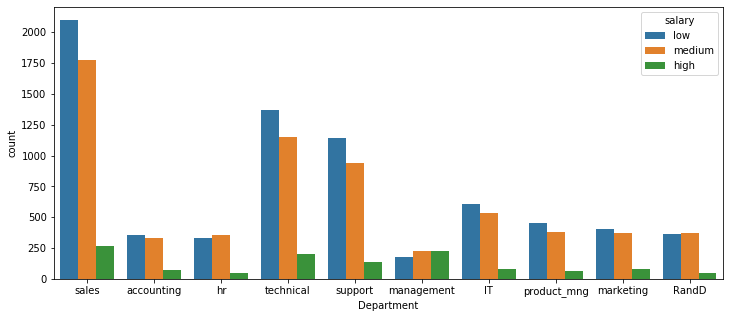

In [15]:
plt.figure(figsize=(12,5))
sns.countplot(data=hr_data, x='Department', hue= 'salary')

### What is the average time spend in the comapny

In [16]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [17]:
hr_data['time_spend_company'].mean(axis = 0)

3.498233215547703

### Longest time spend in the company 

In [18]:
hr_data.sort_values('time_spend_company').tail()

hr_data['time_spend_company'].max()

10

In [19]:
len(hr_data[hr_data['time_spend_company']==hr_data['time_spend_company'].max()])

214

### What is the average month hours of employee who have done the highest number of projects

In [20]:
hr_data[hr_data['number_project']==hr_data['number_project'].max()]['average_montly_hours'].mean()

276.078125

### Analyse the satification level of employees in the company 

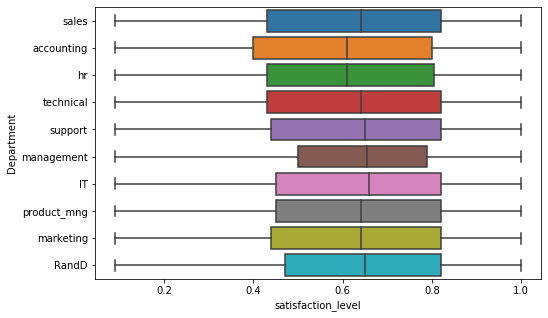

In [23]:
plt.figure(figsize= (8,5))
sns.boxplot(x='satisfaction_level',y='Department',data= hr_data)

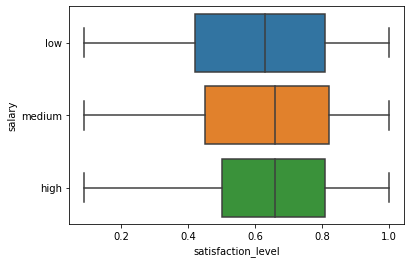

In [25]:
sns.boxplot(data=hr_data, x='satisfaction_level', y= 'salary')

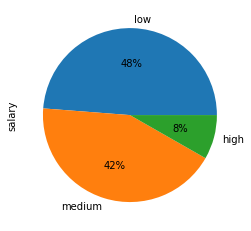

In [26]:
hr_data['salary'].value_counts().plot(kind='pie', autopct='%li%%')
plt.show()

### Out of low salaried employees how many are satisfied below average

In [29]:
(hr_data[hr_data['salary']=='low']['satisfaction_level']< hr_data['satisfaction_level'].mean()).sum()

3513

In [33]:
((hr_data[hr_data['salary']=='low']['satisfaction_level']< hr_data['satisfaction_level'].mean()).sum()/ len(hr_data))*100

23.421561437429162

### Long working hours is a problem for being unsatisfied

In [27]:
hr_data[hr_data['average_montly_hours'] == hr_data['average_montly_hours'].max()]['satisfaction_level'].mean()*100

15.11111111111111